YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

🔹 Number of LNG data points: 123
🔹 Number of LPG data points: 123

📊 Structure of merged DataFrame:
              LNG_Price  LPG_Price
Date                             
2024-12-10  211.895844  22.883366
2024-12-11  214.255432  23.140270
2024-12-12  213.687943  22.788219
2024-12-13  212.124832  22.702585
2024-12-16  209.615891  22.255383

📈 Correlation between prices: 0.31


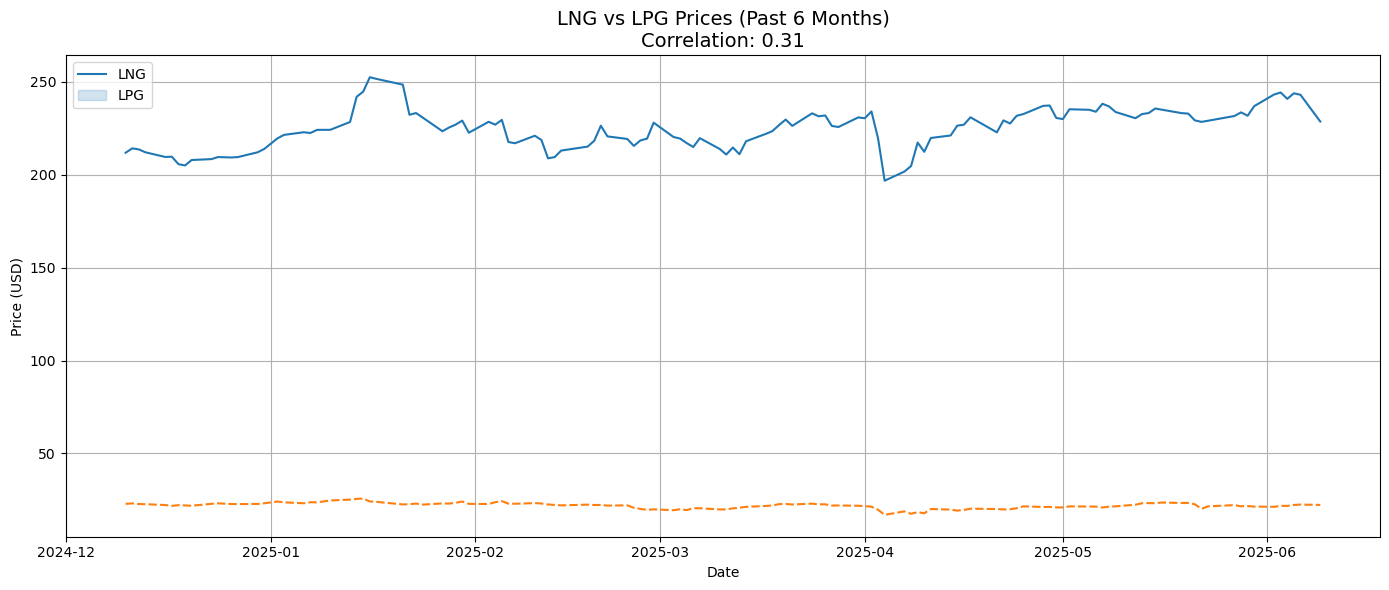

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Download historical data for the last 6 months
lng = yf.download('LNG', period='6mo', interval='1d')
lpg = yf.download('LPG', period='6mo', interval='1d')

print("🔹 Number of LNG data points:", len(lng))
print("🔹 Number of LPG data points:", len(lpg))

# Check if data was retrieved
if lng.empty:
    print("⚠️ No data retrieved for LNG.")
if lpg.empty:
    print("⚠️ No data retrieved for LPG.")

# 2. Select only the 'Close' column
lng = lng[['Close']].rename(columns={'Close': 'LNG_Price'})
lpg = lpg[['Close']].rename(columns={'Close': 'LPG_Price'})

# 3. Merge the dataframes
merged = pd.merge(lng, lpg, left_index=True, right_index=True)

# 4. Flatten the MultiIndex columns to make them accessible
merged.columns = ['LNG_Price', 'LPG_Price']

# 5. Drop rows with missing data
merged.dropna(inplace=True)

# 6. Inspect the structure of the merged dataframe
print("\n📊 Structure of merged DataFrame:\n", merged.head())

# 7. Ensure the data columns are numeric
merged['LNG_Price'] = pd.to_numeric(merged['LNG_Price'], errors='coerce')
merged['LPG_Price'] = pd.to_numeric(merged['LPG_Price'], errors='coerce')

# 8. Remove rows with NaN values (in case there were any during the conversion)
merged.dropna(subset=['LNG_Price', 'LPG_Price'], inplace=True)

# 9. Calculate correlation between LNG and LPG prices
if merged.empty:
    print("⚠️ The merged dataframe is empty. No data available for both symbols on the same dates.")
else:
    correlation = merged['LNG_Price'].corr(merged['LPG_Price'])
    print(f"\n📈 Correlation between prices: {correlation:.2f}")

# 10. Plot the data
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged)


plt.title(f'LNG vs LPG Prices (Past 6 Months)\nCorrelation: {correlation:.2f}', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(labels=['LNG', 'LPG'])
plt.grid(True)
plt.tight_layout()
plt.show()